(-0.5, 224.5, 224.5, -0.5)

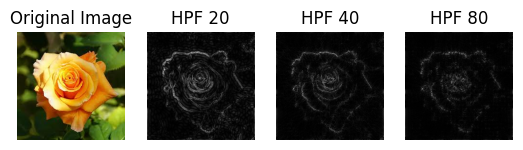

In [1]:
import matplotlib.pyplot as plt	
import cv2
import numpy as np

image = cv2.imread('1-Rose.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
height, width, channel = image.shape

def inversed(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)
    return image_back_filter

def high_pass_filter(rows, cols, cut_off):
    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

hpf_mask_20 = fshift * high_pass_filter(width, height, 20)
hpf_mask_20 = inversed(hpf_mask_20)
hpf_mask_40 = fshift * high_pass_filter(width, height, 40)
hpf_mask_40 = inversed(hpf_mask_40)
hpf_mask_80 = fshift * high_pass_filter(width, height, 80)
hpf_mask_80 = inversed(hpf_mask_80)

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(hpf_mask_20,cmap='gray')
plt.title('HPF 20')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(hpf_mask_40,cmap='gray')
plt.title('HPF 40')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(hpf_mask_80,cmap='gray')
plt.title('HPF 80')
plt.axis('off')


(-0.5, 224.5, 224.5, -0.5)

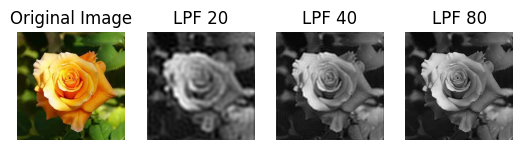

In [4]:
def low_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 1
    return mask    

lpf_mask_20 = fshift * low_pass_filter(width, height, 20)
lpf_mask_20 = inversed(lpf_mask_20)
lpf_mask_40 = fshift * low_pass_filter(width, height, 40)
lpf_mask_40 = inversed(lpf_mask_40)
lpf_mask_80 = fshift * low_pass_filter(width, height, 80)
lpf_mask_80 = inversed(lpf_mask_80)

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(lpf_mask_20,cmap='gray')
plt.title('LPF 20')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lpf_mask_40,cmap='gray')
plt.title('LPF 40')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(lpf_mask_80,cmap='gray')
plt.title('LPF 80')
plt.axis('off')


In [11]:
%pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      
      *** Please install the `scikit-image` package (instead of `skimage`) ***
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from scipy.fft import fftfreq, fftshift

def butterworth_filter(image, cutoff_frequency_ratio, order=3):
    # Compute the Fourier transform of the image
    image_fft = np.fft.fft2(image)
    
    # Create Butterworth filter kernel
    rows, cols = image.shape
    u = fftfreq(cols)
    v = fftfreq(rows)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff_frequency_ratio)**(2 * order))
    
    # Apply the filter to the Fourier transform of the image
    filtered_image_fft = image_fft * H
    
    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_image_fft).real
    
    return filtered_image

# Load the image using skimage.io.imread()
image = io.imread('1-Rose.jpg', as_gray=True)

# cutoff frequencies as a fraction of the maximum frequency
cutoffs = [0.02, 0.08, 0.16]

# Perform filtering with the Butterworth filter at a range of cutoffs.
lowpass_filtered = []
highpass_filtered = []

for cutoff in cutoffs:
    lowpass_filtered.append(butterworth_filter(image, cutoff))
    highpass_filtered.append(image - lowpass_filtered[-1])

# Plot the filtered images
fig, axes = plt.subplots(2, len(cutoffs) + 1, figsize=(12, 8))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[1, 0].axis('off')
for i, cutoff in enumerate(cutoffs):
    axes[0, i + 1].imshow(lowpass_filtered[i], cmap='gray')
    axes[0, i + 1].set_title(f'Lowpass (cutoff={cutoff})')
    axes[1, i + 1].imshow(highpass_filtered[i], cmap='gray')
    axes[1, i + 1].set_title(f'Highpass (cutoff={cutoff})')
    axes[1, i + 1].axis('off')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'skimage'

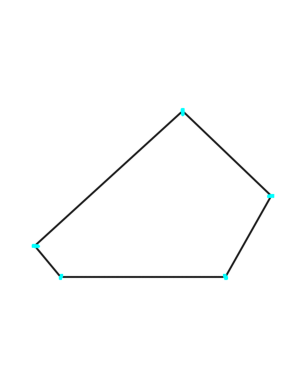

In [2]:
gif_path = "2-Pentagon.gif"

capture = cv2.VideoCapture(gif_path)
ret,frame = capture.read()

def haris_corner(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corner = cv2.cornerHarris(gray,10,5,0.04)
    corner = cv2.dilate(corner,None)
    threshold = corner > 0.01*corner.max()
    image[threshold]= [0,255,255]

    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.axis('off')  
    
haris_corner(frame)


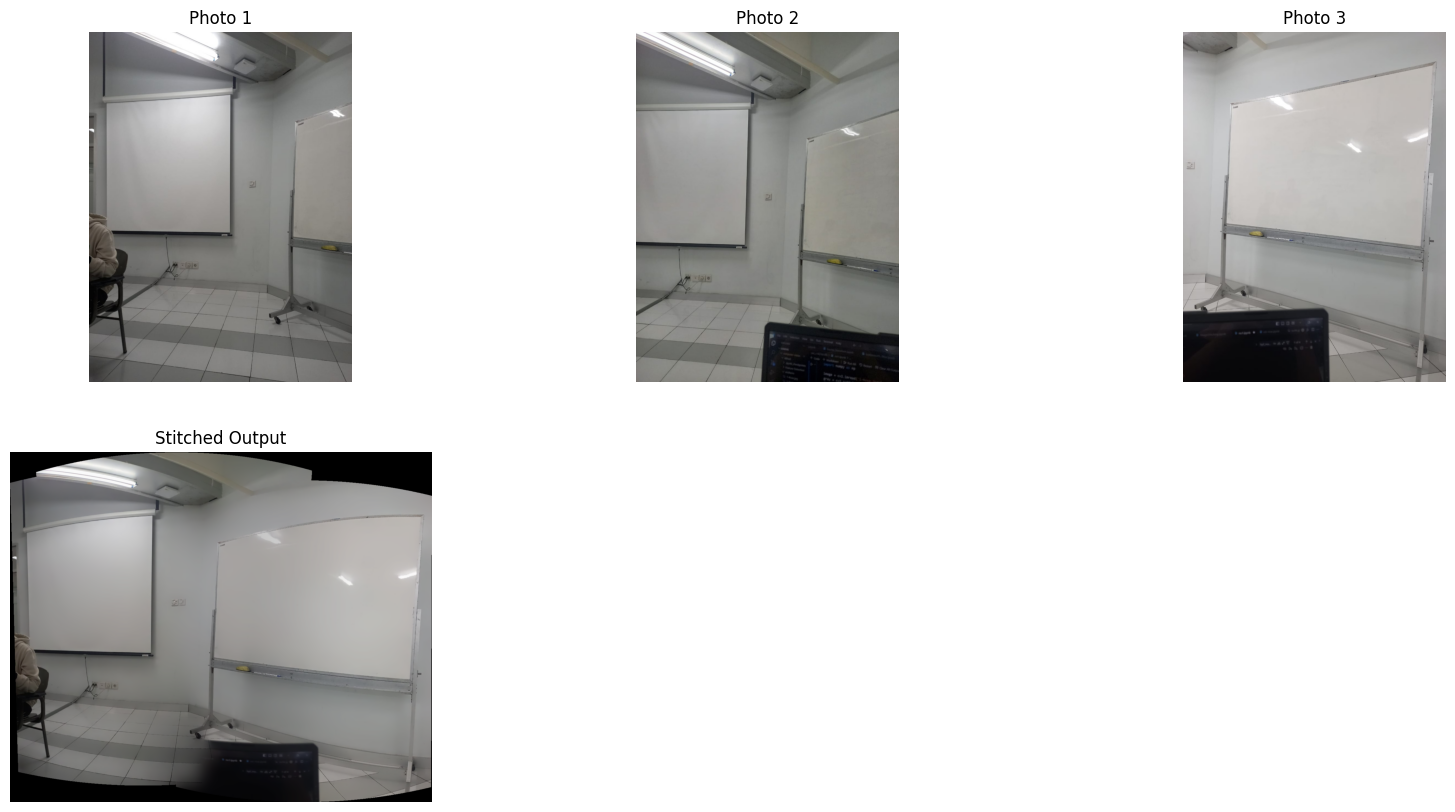

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    imagePaths = ["kiri.jpg", "depan.jpg", "kanan.jpg"]
    images = []

    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        images.append(image)

    stitcher = cv2.Stitcher_create() 
    (status, stitched) = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        fig, axes = plt.subplots(2, len(images), figsize=(20, 10))
                
        for i, imagePath in enumerate(imagePaths):
            img = cv2.imread(imagePath)
            axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[0, i].set_title(f"Photo {i+1}")

            axes[0, i].axis('off')
        
        output_img = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
        axes[1, 0].imshow(output_img)
        axes[1, 0].set_title("Stitched Output")
        axes[1, 0].axis('off')

        for j in range(1, len(images)):
            fig.delaxes(axes[1, j])

        plt.show()

    else:
        print("image stitching failed ({})".format(status))

if __name__ == "__main__":
    main()
